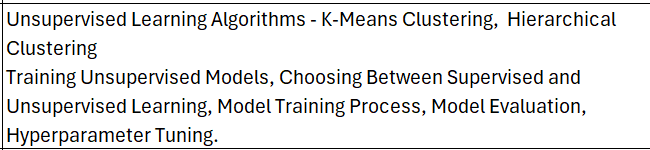

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X = iris.drop('species',axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
model = KMeans(n_clusters=3, random_state=42,verbose=1,n_init='auto')
labels = model.fit_predict(X)
labels

Initialization complete
Iteration 0, inertia 137.45999999999998.
Iteration 1, inertia 87.34370373227631.
Iteration 2, inertia 84.71232984452898.
Iteration 3, inertia 84.01277888865147.
Iteration 4, inertia 83.04698186876973.
Iteration 5, inertia 81.74960206772619.
Iteration 6, inertia 80.806376.
Iteration 7, inertia 79.87357983461304.
Iteration 8, inertia 79.34436414532674.
Iteration 9, inertia 78.92130972222222.
Iteration 10, inertia 78.8556658259773.
Converged at iteration 10: strict convergence.


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [6]:
# if we want to compare the clusters with the original species
lis = ['virginica','setosa','versicolor']
compar = iris['species'].compare(pd.Series(labels))
compar['other'].map(lambda i:lis[i]) == compar['self']


0       True
1       True
2       True
3       True
4       True
       ...  
145     True
146    False
147     True
148     True
149    False
Length: 150, dtype: bool

There are two types of clustering
- Agglomerative Clustering (bottom-up)
- Heirarchichal Clustering (top-down)

In [7]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [8]:
agg_model = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_model.fit_predict(X)
agg_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [9]:
pca = PCA(n_components=2)
X_red = pca.fit_transform(X)
X_red[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

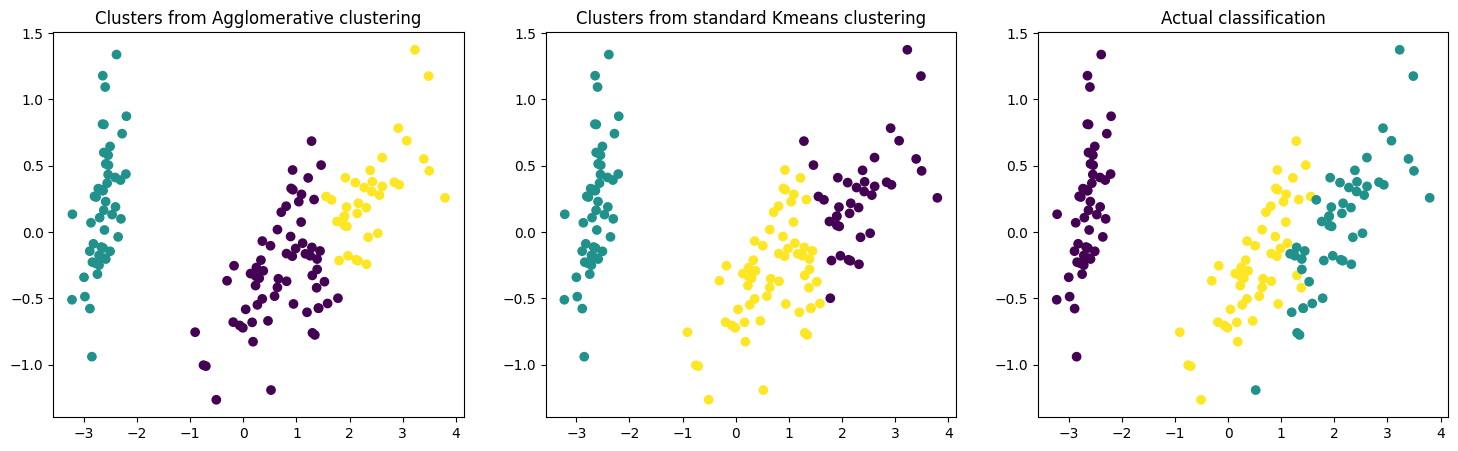

In [10]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_size_inches(18,5)

ax1.scatter(X_red[:,0], X_red[:, 1], c = agg_labels)
ax1.set_title("Clusters from Agglomerative clustering")


ax2.scatter(X_red[:, 0], X_red[:, 1], c=labels)
ax2.set_title("Clusters from standard Kmeans clustering")


ax3.scatter(X_red[:, 0], X_red[:, 1], c=iris['species'].map(lambda i:['setosa','virginica','versicolor'].index(i)))
ax3.set_title("Actual classification")

plt.show()

In [11]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [12]:
silhouette_score(X, agg_labels), silhouette_score(X, labels)

(0.5543236611296426, 0.5511916046195927)

In [13]:
davies_bouldin_score(X, agg_labels), davies_bouldin_score(X, labels)

(0.6562564540642021, 0.6660385791628493)

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

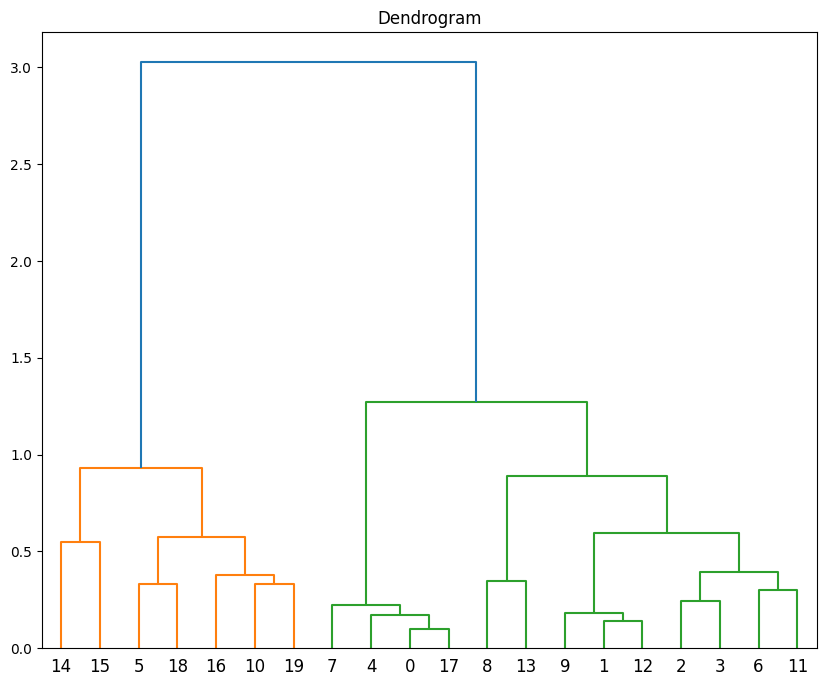

In [17]:
plt.figure(figsize=(10,8))
plt.title("Dendrogram")
lk = linkage(X.head(20), method='ward')
dendrogram(lk)
plt.show()

In [25]:
ward = linkage(X.head(20), method="ward")
average = linkage(X.head(20), method="average")
single = linkage(X.head(20), method="single")
complete = linkage(X.head(20), method="complete")

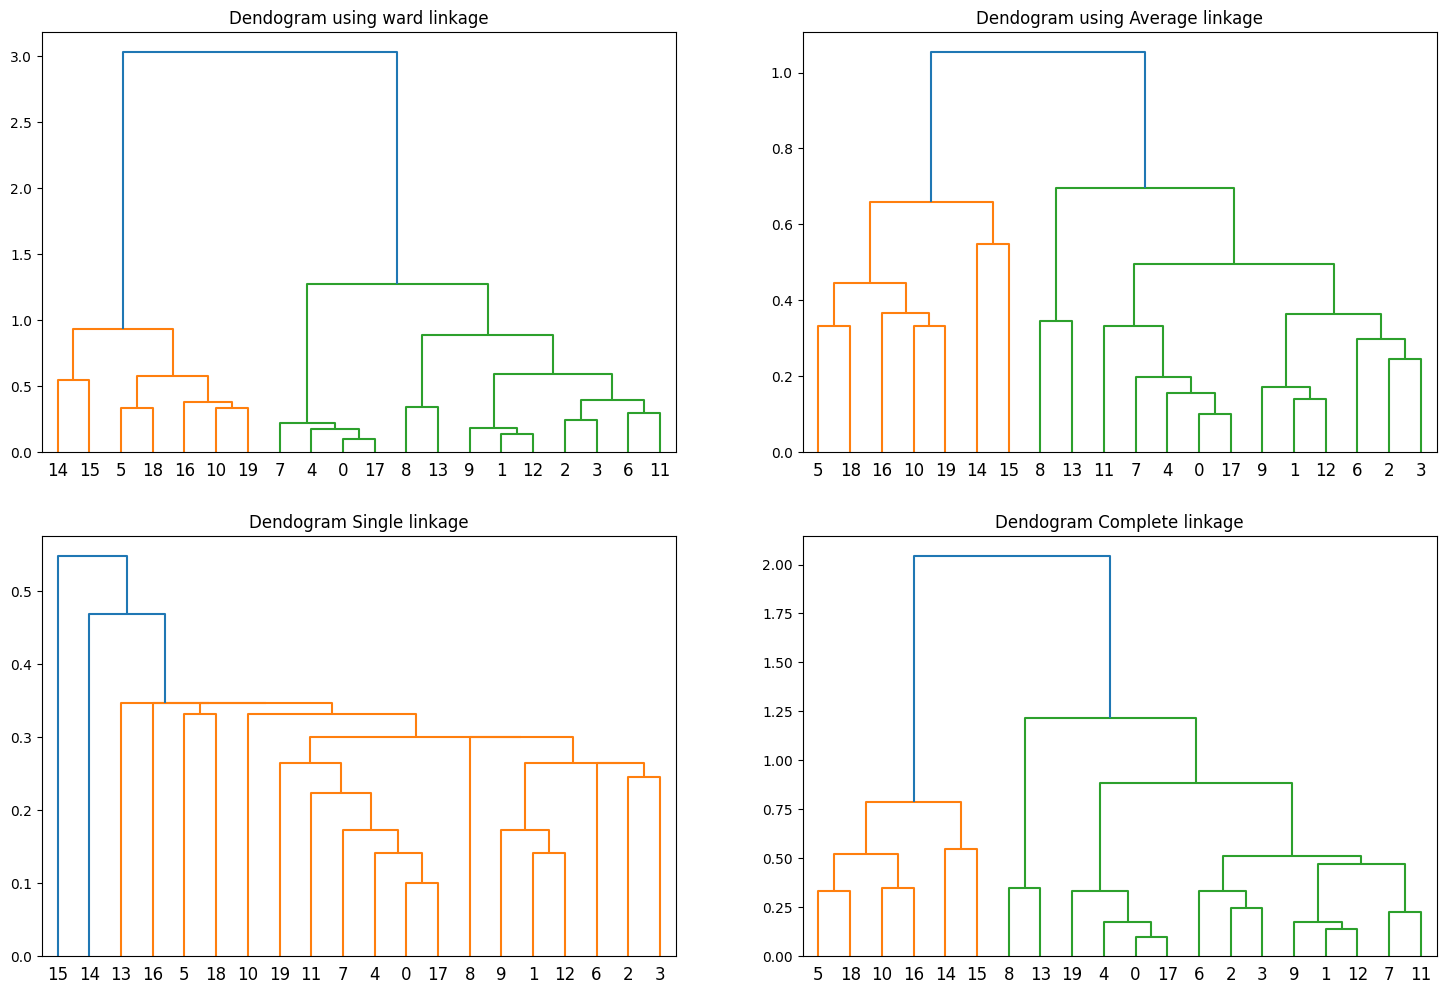

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
fig.set_size_inches(18, 12)


dendrogram(ward, ax=ax1)
ax1.set_title("Dendogram using ward linkage")


dendrogram(average, ax=ax2)
ax2.set_title("Dendogram using Average linkage")


dendrogram(single, ax=ax3)
ax3.set_title("Dendogram Single linkage")

dendrogram(complete, ax=ax4)
ax4.set_title("Dendogram Complete linkage")

plt.show()